# Project Description

In this project, we will implement a recommendation system using methods:
1. **Product-Based Filtering**: Product based filtering recommend the product that are similar to the product that user has previously bought. It depends on the characteristics of the product, matching the product based on the rating from users.

2. **Product Popularity-Based Filtering**: Product popularity based filtering recommend the product that are popular and frequently bought and rated highly by the users. Popularity may vary depending on the criteria we set.

3. **User-Based Filtering**: User-based filtering recommends the product based on the similar user.. It identifies users with similar preferences and suggests products based on their collective behavior.

For preprocessing, we will reduce the dataset rows so that we do not encounter memory issues while calculating the user-verses-product matrix. 
We perform EDA to indentify the product with highest rating, user whow frequently provide rating ans so on.

The dataset has following features:
1. UserID
2. ProductID
3. Rating
4. Time


# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ratings_Electronics.csv',header = None )
df.columns = ["ProductID" , "UserID" , "Rating" , "Time" ] 
df['Rating'] = df['Rating'].astype('int8')
# for simplicity we will remove the time feature 
df.drop('Time' , axis = 1 , inplace = True)

In [3]:
df.head()

,ProductID,UserID,Rating
0,AKM1MP6P0OYPR,0132793040,5
1,A2CX7LUOHB2NDG,0321732944,5
2,A2NWSAGRHCP8N5,0439886341,1
3,A2WNBOD3WNDNKT,0439886341,3
4,A1GI0U4ZRJA8WN,0439886341,1


# Check data info

In [4]:
print("Shape of dataframe", df.shape)

Shape of dataframe (7824482, 3)


# Exploratory data analysis

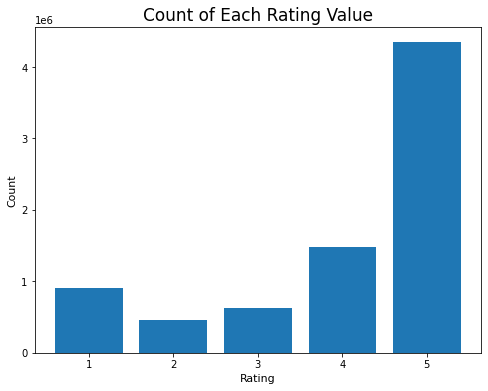

In [5]:
# count the occurrence of each rating value
rating_counts = df['Rating'].value_counts().sort_index()

# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of Each Rating Value', fontsize=17)
plt.xticks(rating_counts.index)
plt.show()

We can see that people have rate the product 5 most frequently compared to other rating value.

In [6]:
# get user who have frequently rated the product as 5
rating_5_df = df[df['Rating'] == 5]

most_frequent_user_id = rating_5_df['UserID'].value_counts().idxmax()

print("User who rated a product as 5 most frequently:", most_frequent_user_id)

User who rated a product as 5 most frequently: B0074BW614


In [7]:
# get user who have frequently rated the product as 1
rating_1_df = df[df['Rating'] == 1]

most_frequent_user_id = rating_1_df['UserID'].value_counts().idxmax()

print("User who rated a product as 1 most frequently:", most_frequent_user_id)

User who rated a product as 1 most frequently: B00DR0PDNE


In [8]:
# get product which was frequently rated as 5
rating_5_df = df[df['Rating'] == 5]

most_frequent_product_id = rating_5_df['ProductID'].value_counts().idxmax()

print("Product which was rated as 5 most frequently:", most_frequent_product_id)

Product which was rated as 5 most frequently: A680RUE1FDO8B


In [9]:
# get product which was frequently rated as 1
rating_1_df = df[df['Rating'] == 1]

most_frequent_product_id = rating_1_df['ProductID'].value_counts().idxmax()

print("Product which was rated as 1 most frequently:", most_frequent_product_id)

Product which was rated as 1 most frequently: A20DZX38KRBIT8


# Preprocessing data

In [10]:
print("shape of dataset", df.shape)

shape of dataset (7824482, 3)


The dataset is quite large, and it will become even larger when we generate a user-versus-product matrix. To address this, we plan to reduce the dataset's size. Instead of simply truncating the data, we will remove products that receive rare ratings and users who rarely rate products. By doing this, we will have complete data for a select few products and users compared to the original dataframe. However, randomly truncating the data would result in incomplete reviews for the included users and products, which would effect the accuracy of recommendations. It is preferable to maintain complete data for a smaller subset of users and products rather than having incomplete information for a larger number of users and products

In [11]:
# Count unique user IDs along with their occurence count
user_counts = df['UserID'].value_counts().reset_index()
user_counts.columns = ['UserID', 'occurrence_count']

# Count unique product IDs along with their occurence count
product_counts = df['ProductID'].value_counts().reset_index()
product_counts.columns = ['ProductID', 'occurrence_count']

print("Unique User IDs with Occurrence Count:")
print(user_counts)

print("\nUnique Product IDs with Occurrence Count:")
print(product_counts)

Unique User IDs with Occurrence Count:
            UserID  occurrence_count
0       B0074BW614             18244
1       B00DR0PDNE             16454
2       B007WTAJTO             14172
3       B0019EHU8G             12285
4       B006GWO5WK             12226
...            ...               ...
475997  B004WL91KI                 1
475998  B004WL9FK4                 1
475999  B004WL9Q2Q                 1
476000  B004WL9R8O                 1
476001  BT008V9J9U                 1

[476002 rows x 2 columns]

Unique Product IDs with Occurrence Count:
              ProductID  occurrence_count
0         A5JLAU2ARJ0BO               520
1          ADLVFFE4VBT8               501
2        A3OXHLG6DIBRW8               498
3          A6FIAB28IS79               431
4         A680RUE1FDO8B               406
...                 ...               ...
4201691  A1IUWX30VMVJGP                 1
4201692  A1WBP7XSZI6AUL                 1
4201693  A2K7UNJHE9ZR0G                 1
4201694  A1A6SIW6EWF6FP    

In [12]:
min_occurrence = 50
product_filtered_df = df[df['ProductID'].isin(product_counts[product_counts['occurrence_count'] >= min_occurrence]['ProductID'])]
print("The shape of dataframe after removing product which are rarely rated (rated by less than 50 users) :",product_filtered_df.shape)

The shape of dataframe after removing product which are rarely rated (rated by less than 50 users) : (125871, 3)


In [13]:
min_occurrence = 50
user_filtered_df = product_filtered_df[product_filtered_df['UserID'].isin(user_counts[user_counts['occurrence_count'] >= min_occurrence]['UserID'])]
print("The shape of dataframe after removing user which are rarely rated product(rated less than 50 products) :",user_filtered_df.shape)

The shape of dataframe after removing user which are rarely rated product(rated less than 50 products) : (79182, 3)


In [14]:
print("shape of dataset", user_filtered_df.shape)

shape of dataset (79182, 3)


In [15]:
#check data type of features
user_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79182 entries, 492 to 7824221
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductID  79182 non-null  object
 1   UserID     79182 non-null  object
 2   Rating     79182 non-null  int8  
dtypes: int8(1), object(2)
memory usage: 1.9+ MB


In [16]:
# check for missing values
user_filtered_df.isnull().sum()

ProductID    0
UserID       0
Rating       0
dtype: int64

Since we do not have any missing value we do not need to handle the missing values.

# Item based recommendation

## Cosine similarity based

In [17]:
matrix = user_filtered_df.pivot_table(index= ['ProductID'] , columns = ['UserID'] , values= 'Rating').fillna(0) 
def find_similar_product(matrix,current_product_index, k  ) : 

    curr_product = matrix[matrix.index == current_product_index]
    print(curr_product.shape)
    other_products = matrix[matrix.index != current_product_index]
    similarities = cosine_similarity(curr_product,other_products)[0].tolist()

    indices = other_products.index.tolist()

    index_similarity = dict(zip(indices, similarities))

    # Sort the dictionary by values in descending order
    sorted_dict = dict(sorted(index_similarity.items(), key=lambda item: item[1], reverse=True))

    l = len(sorted_dict)  
  

    products =  list(sorted_dict.items())[:min(l , k )]

    return products 

def getRecommendations(df, matrix , user  , k ) : 

    last_product = df[df['UserID'] == user ].ProductID.values[0]
    return find_similar_product(matrix,last_product ,  10  )  


In [18]:
print(getRecommendations(user_filtered_df,matrix,user_filtered_df.UserID.values[0] , 10))

(1, 16993)
[('ADZF3QDGSZE7K', 0.07460086063227521), ('A2WDCAMKCCP1UR', 0.07443394228040227), ('ASFW4ZMNZJKDA', 0.06933316668238468), ('AAXAKFQEAQPWC', 0.06818816410743525), ('A3J2YU2D9BH2J7', 0.06386190408340514), ('A195EZSQDW3E21', 0.06276605454133181), ('A3IK2VCQ007CJ', 0.06254548689221977), ('A2Y4H3PXB07WQI', 0.061683203197057675), ('A32NEDX6UVV8DE', 0.05883256544369696), ('A2J3VCGBNDLAKF', 0.05842182014721399)]


# Product popularity based recommendation

We can create a product recommendation system based on product popularity, where we recommend the most popular products. To categorize a product as popular, we consider factors such as its total number of ratings, average rating, the number of 5-star ratings, and the rarity of receiving a 1-star rating. This ensures that the recommended products are not only popular but also highly rated and rarely receive 1-star ratings.

The popularity-based recommendation systems do not consider user behavior or individual user preferences. So it might be as effective as other recommendation methods.

In [19]:
def get_top_n_popular_product(df, n):

    popularity_df = df.groupby('ProductID').agg(
        rating_count = pd.NamedAgg(column='UserID', aggfunc='count'),
        avg_rating = pd.NamedAgg(column='Rating', aggfunc='mean'),
        rating_5_count = pd.NamedAgg(column='Rating', aggfunc=lambda x: (x == 5).sum()),
        rating_1_count = pd.NamedAgg(column='Rating', aggfunc=lambda x: (x == 1).sum())
    ).reset_index()

    popularity_df.head()

    sorted_popularity = popularity_df.sort_values(by=['rating_count', 'avg_rating', 'rating_5_count', 'rating_1_count'], ascending=[False, False, False, True])

    top_n_recommendations = sorted_popularity.head(n)  

    return top_n_recommendations
    

In [20]:
print("Top 10 Popular rating are \n", get_top_n_popular_product(user_filtered_df,10))

Top 10 Popular rating are 
            ProductID  rating_count  avg_rating  rating_5_count  rating_1_count
1287    ADLVFFE4VBT8           310    4.332258             178               8
1086  A3OXHLG6DIBRW8           286    4.475524             156               1
1210    A6FIAB28IS79           284    4.288732             154               2
1209   A680RUE1FDO8B           271    4.531365             208               8
264   A1ODOGXEYECQQ8           221    4.384615             107               0
1203   A5JLAU2ARJ0BO           213    3.798122             105              26
1439   ARBKYIVNYWK3C           204    4.431373             113               1
903   A36K2N527TXXJN           202    4.529703             120               1
790   A2XRMQA6PJ5ZJ8           183    4.683060             136               1
462   A25C2M3QF9G7OQ           176    4.590909             124               0


# User based recommendation


In user based recommendation, we recommend the product that are brought by other user who have similar preference. 

## Cosine Similarity based

In [21]:
matrix = user_filtered_df.pivot_table(index= ['UserID'] , columns = ['ProductID'] , values= 'Rating').fillna(0) 

def find_similar_user(matrix,current_user_index, k  ) : 

    curr_user = matrix[matrix.index == current_user_index]
    other_users = matrix[matrix.index != current_user_index]
    similarities = cosine_similarity(curr_user,other_users)[0].tolist()

    indices = other_users.index.tolist()

    index_similarity = dict(zip(indices, similarities))

    sorted_dict = dict(sorted(index_similarity.items(), key=lambda item: item[1], reverse=True))

    l = len(sorted_dict)  
  
    users =  list(sorted_dict.items())[:min(l , k )]

    return users 

def getRecommendations(df, matrix , user  , k ) : 
    
    #find 100 similar users
    users = find_similar_user(matrix,user , 100 )
    users = [tup[0] for tup in users]
    
    products = df[df['UserID'] == user ].ProductID 

    #find the product similar to similar users
    similar_products = df[df['UserID'].isin(users)][['ProductID' , 'Rating']]
    sorted_products = similar_products.groupby('ProductID').agg('median').sort_values(by = "Rating" , ascending = False )

    l = len(sorted_products ) 

    return sorted_products[ : min( l , k )]


In [22]:
print(getRecommendations(user_filtered_df,matrix,user_filtered_df.UserID.values[0] , 10))

                Rating
ProductID             
A100WO06OQR8BQ     5.0
A37D1ZP8GBHE38     5.0
A2ZGDHLJ85T6AD     5.0
A2ZR3YTMEEIIZ4     5.0
A3094EPI56GKZ6     5.0
A30XZK10EZN9V4     5.0
A32O5FZH994CNY     5.0
A33152QEGO2MZN     5.0
A33XMCG1UFDSY2     5.0
A341HCMGNZCBIT     5.0
